In [1]:
import pandas as pd
import string
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import unicodedata
from sklearn.linear_model import RidgeCV
import numpy as np
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import shap
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from scikeras.wrappers import KerasRegressor
import xgboost as xgb
import tensorflow as tf
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [2]:
X_train = pd.read_csv('/Users/emilfalk/Desktop/X_train.csv')
X_test = pd.read_csv('/Users/emilfalk/Desktop/X_test.csv')
y_train = pd.read_csv('/Users/emilfalk/Desktop/y_train.csv')
y_test = pd.read_csv('/Users/emilfalk/Desktop/y_test.csv')

In [3]:
fp_mean = X_train['FP'].mean()

X_train['FP'] = fp_mean
X_test['FP'] = fp_mean

In [22]:
player_names = X_test['Player']

In [3]:
X_train = X_train.drop(columns=['Player']) 
X_test = X_test.drop(columns=['Player']) 

In [4]:
X_train_basketball = X_train.drop(['years_with_team', 'draft_pos', 'all_star', 'num_teams', 'ig_followers', 'resigned', 'Agent'], axis=1)
X_test_basketball = X_test.drop(['years_with_team', 'draft_pos', 'all_star', 'num_teams', 'ig_followers', 'resigned', 'Agent'], axis=1)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)
basketball_scaler = StandardScaler()
X_train_basketball_scaled = basketball_scaler.fit_transform(X_train_basketball) 
X_test_basketball_scaled = basketball_scaler.transform(X_test_basketball)

In [6]:
X_train_scaled_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
X_train_basketball_scaled_cnn = X_train_basketball_scaled.reshape(X_train_basketball_scaled.shape[0], X_train_basketball_scaled.shape[1], 1)
X_test_basketball_scaled_cnn = X_test_basketball_scaled.reshape(X_test_basketball_scaled.shape[0], X_test_basketball_scaled.shape[1], 1)

## Inspection

Dataset Size:
X_train: 354 rows, 35 features
X_test: 89 rows, 35 features



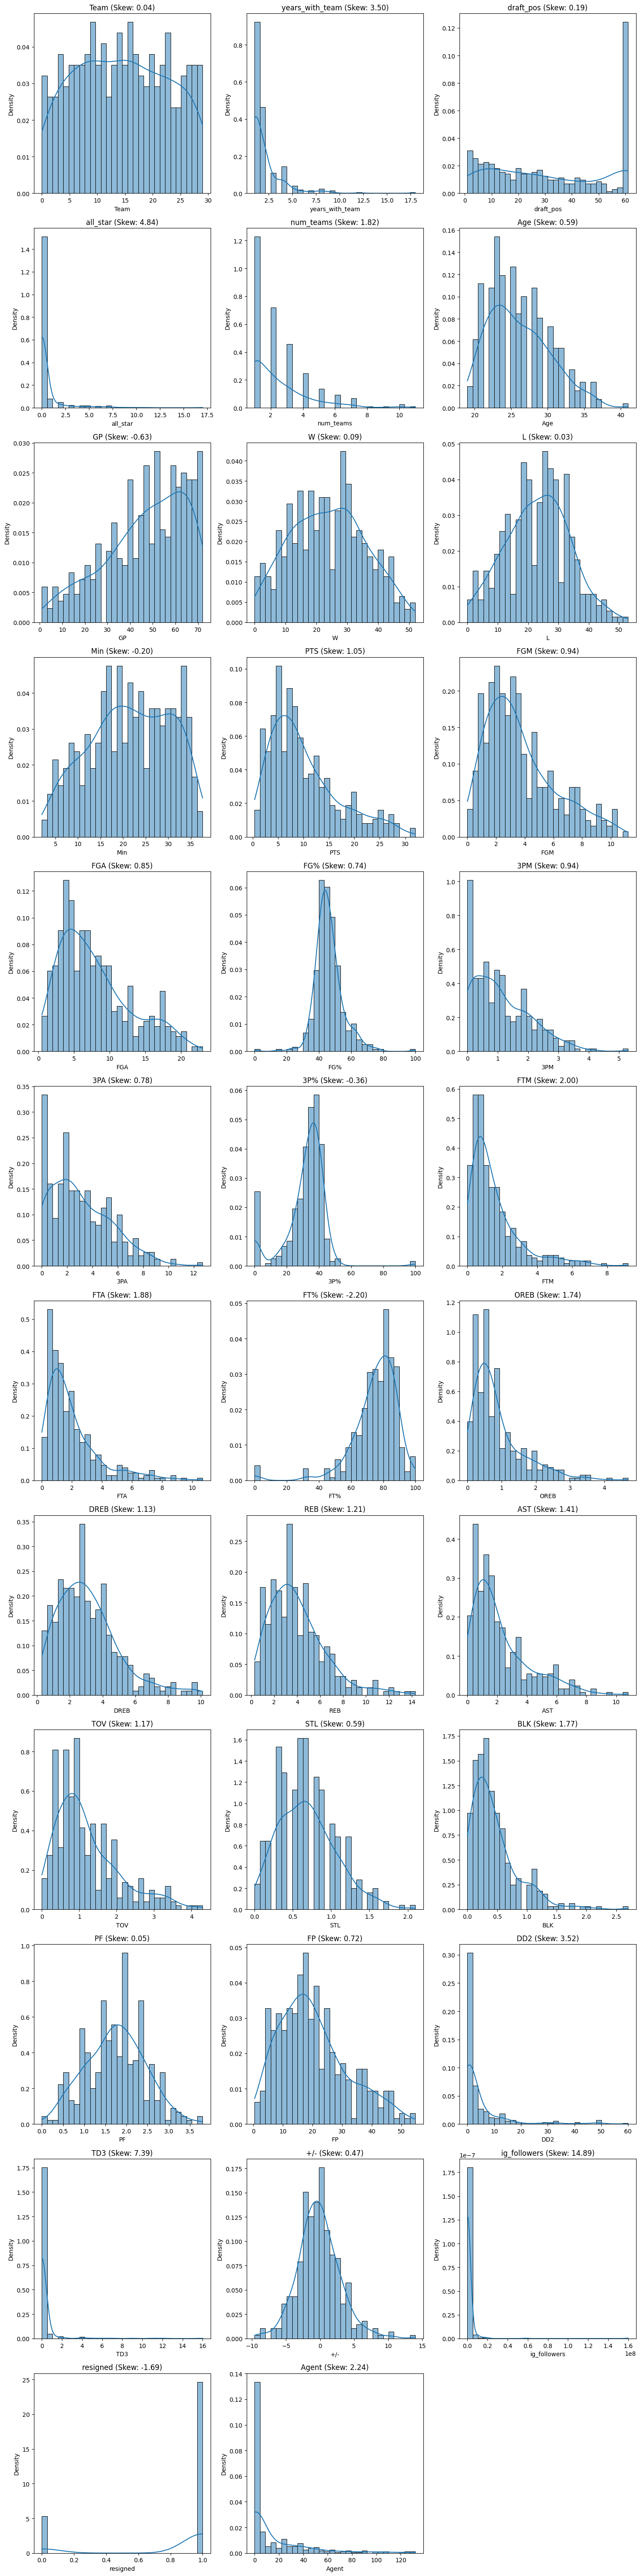

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

print("Dataset Size:")
print(f"X_train: {X_train.shape[0]} rows, {X_train.shape[1]} features")
print(f"X_test: {X_test.shape[0]} rows, {X_test.shape[1]} features")
print()

n_features = X_train.shape[1]
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols  

plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(X_train.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X_train[column], kde=True, stat="density", bins=30)
    plt.title(f'{column} (Skew: {skewness[column]:.2f})')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

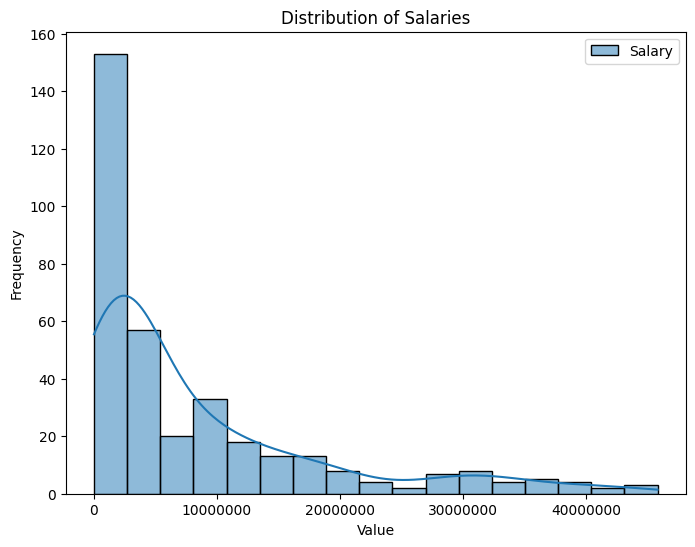

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [12]:
y_train_values = y_train.values.flatten() if isinstance(y_train, pd.DataFrame) else y_train

Q1 = np.percentile(y_train_values, 25)
Q3 = np.percentile(y_train_values, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = y_train_values[(y_train_values < lower_bound) | (y_train_values > upper_bound)]
print("Number of outliers:", len(outliers))
print("Outlier values:", outliers)

Number of outliers: 34
Outlier values: [44310840 29925000 28103500 32405817 26758928 30864198 31650600 26984128
 33724200 29467800 31579390 31650600 44310840 31579390 39344900 28103500
 36016200 28103500 33003936 45780966 39344970 35500000 35328700 30013500
 33003936 42018900 39344900 41180544 35344828 31044906 28103500 39344900
 29467800 35995950]


## Ridge Regression

In [7]:
ridge = Ridge(random_state=42)

param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

grid_search_basketball = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_basketball.fit(X_train_basketball_scaled, y_train.values.ravel())
print(f"Best Ridge alpha (Basketball Features): {grid_search_basketball.best_params_['alpha']}")

grid_search_full = GridSearchCV(ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_full.fit(X_train_scaled, y_train.values.ravel())
print(f"Best Ridge alpha (Non-Basketball Features): {grid_search_full.best_params_['alpha']}")

Best Ridge alpha (Basketball Features): 100.0
Best Ridge alpha (Non-Basketball Features): 100.0


## Lasso Regression

In [8]:
lasso = Lasso(random_state=42)
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}


grid_search_basketball = GridSearchCV(lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_basketball.fit(X_train_basketball_scaled, y_train.values.ravel())
print(f"Best Lasso alpha (Basketball Features): {grid_search_basketball.best_params_['alpha']}")

grid_search_full = GridSearchCV(lasso, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_full.fit(X_train_scaled, y_train.values.ravel())
print(f"Best Lasso alpha (Non-Basketball Features): {grid_search_full.best_params_['alpha']}")

Best Lasso alpha (Basketball Features): 100.0
Best Lasso alpha (Non-Basketball Features): 100.0


/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+15, tolerance: 3.181e+12
  model = cd_fast.enet_coordinate_descent(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.485e+15, tolerance: 2.703e+12
  model = cd_fast.enet_coordinate_descent(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

## Decision Tree

In [13]:
dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_basketball = GridSearchCV(dt, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_basketball.fit(X_train_basketball_scaled, y_train.values.ravel())
print(f"Best Decision Tree params (Basketball Features): {grid_search_basketball.best_params_}")

grid_search_full = GridSearchCV(dt, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_full.fit(X_train_scaled, y_train.values.ravel())
print(f"Best Decision Tree params (Non-Basketball Features): {grid_search_full.best_params_}")

Best Decision Tree params (Basketball Features): {'max_depth': 5, 'min_samples_split': 5}
Best Decision Tree params (Non-Basketball Features): {'max_depth': 3, 'min_samples_split': 10}


## Random Forest

In [10]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid_search_basketball = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_basketball.fit(X_train_basketball_scaled, y_train.values.ravel())
print(f"Best Random Forest params (Basketball Features): {grid_search_basketball.best_params_}")

grid_search_full = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_full.fit(X_train_scaled, y_train.values.ravel())
print(f"Best Random Forest params (Non-Basketball Features): {grid_search_full.best_params_}")

Best Random Forest params (Basketball Features): {'max_depth': 10, 'n_estimators': 200}
Best Random Forest params (Non-Basketball Features): {'max_depth': 5, 'n_estimators': 200}


## XGBoost

In [11]:
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

grid_search_basketball = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_basketball.fit(X_train_basketball_scaled, y_train.values.ravel())
print(f"Best XGBoost params (Basketball Features): {grid_search_basketball.best_params_}")

grid_search_full = GridSearchCV(xgb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_full.fit(X_train_scaled, y_train.values.ravel())
print(f"Best XGBoost params (Non-Basketball Features): {grid_search_full.best_params_}")

Best XGBoost params (Basketball Features): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best XGBoost params (Non-Basketball Features): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


## Multilayer Perceptron

In [14]:
mlp = MLPRegressor(random_state=42, max_iter=1000)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'learning_rate_init': [0.001, 0.01]
}

grid_search_basketball = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_basketball.fit(X_train_basketball_scaled, y_train.values.ravel())
print(f"Best MLP params (Basketball Features): {grid_search_basketball.best_params_}")

grid_search_full = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_full.fit(X_train_scaled, y_train.values.ravel())
print(f"Best MLP params (Non-Basketball Features): {grid_search_full.best_params_}")

/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.wa

Best MLP params (Basketball Features): {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}


/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.wa

Best MLP params (Non-Basketball Features): {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}


/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


All columns (35): ['Team', 'years_with_team', 'draft_pos', 'all_star', 'num_teams', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'ig_followers', 'resigned', 'Agent']
Feature columns for SHAP (34): ['years_with_team', 'draft_pos', 'all_star', 'num_teams', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'ig_followers', 'resigned', 'Agent']
X_train_scaled shape: (354, 35)
X_test_scaled shape: (89, 35)

Average SHAP values for Group 1:
ig_followers: 389660.5000
resigned: 17500.3809
Agent: 25826.6055
years_with_team: 144753.7188
draft_pos: 791220.1250
all_star: 1369389.2500
num_teams: 263639.4688
Average SHAP for remaining features (27 features): 423181.0000

Average SHAP values for Group 2:
ig_followers: 369324.1875
res

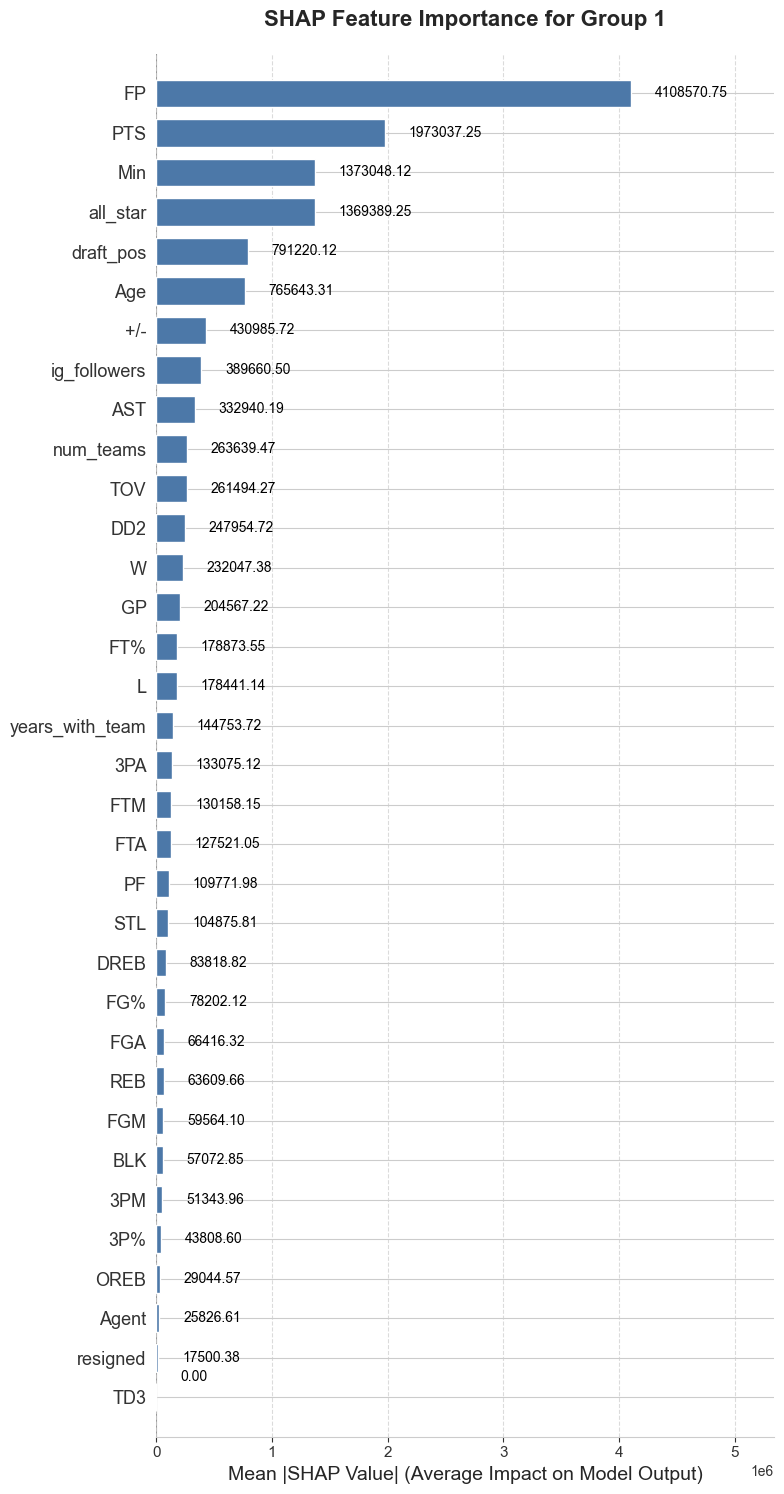

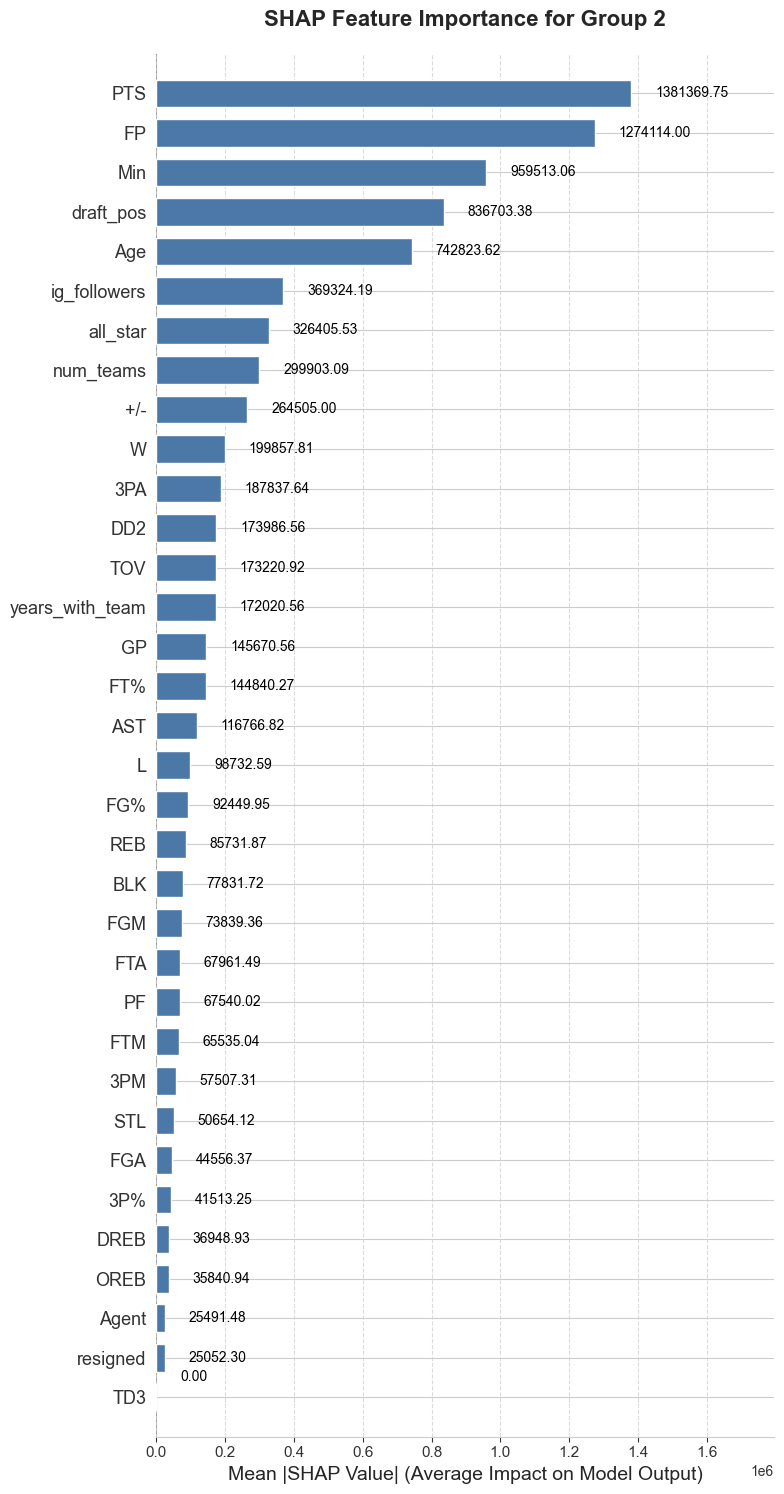

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import uuid

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 10,
    'ytick.labelsize': 12,
    'font.family': 'Arial'
})

all_columns = list(X_train.columns)
print(f"All columns ({len(all_columns)}): {all_columns}")

feature_columns = [col for col in X_train.columns if col != 'Team']
print(f"Feature columns for SHAP ({len(feature_columns)}): {feature_columns}")

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

if X_train_scaled.shape[1] != xgb_full.get_booster().num_features():
    raise ValueError(f"Feature mismatch: Model expects {xgb_full.get_booster().num_features()} features, but X_train_scaled has {X_train_scaled.shape[1]}")

X_train_features_df = pd.DataFrame(X_train_scaled, columns=all_columns)
X_test_features_df = pd.DataFrame(X_test_scaled, columns=all_columns)

group1_teams = [19, 0, 15, 6, 9]
group2_teams = [28, 7, 17, 21, 29]

def compute_shap_for_group(group_teams, group_name, X_test, X_test_scaled, all_columns, feature_columns, model):
    group_data = X_test[X_test['Team'].isin(group_teams)]
    
    if group_data.empty:
        print(f"No data found for {group_name} teams: {group_teams}")
        return

    group_indices = group_data.index

    group_data_features = pd.DataFrame(X_test_scaled[group_indices], columns=all_columns)

    group_predictions = model.predict(group_data_features)

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(group_data_features)
    
    specified_features = ['ig_followers', 'resigned', 'Agent', 'years_with_team', 'draft_pos', 'all_star', 'num_teams']
    
    team_idx = all_columns.index('Team') if 'Team' in all_columns else None
    if team_idx is not None:
        plot_shap_values = np.delete(shap_values, team_idx, axis=1)
        plot_features = feature_columns
    else:
        plot_shap_values = shap_values
        plot_features = all_columns
    
    mean_shap_values = np.abs(plot_shap_values).mean(axis=0)
    
    print(f"\nAverage SHAP values for {group_name}:")
    specified_shap_sum = 0
    for feature in specified_features:
        if feature in plot_features:
            idx = plot_features.index(feature)
            shap_value = mean_shap_values[idx]
            print(f"{feature}: {shap_value:.4f}")
            specified_shap_sum += shap_value
    
    remaining_features = [f for f in plot_features if f not in specified_features]
    if remaining_features:
        remaining_indices = [plot_features.index(f) for f in remaining_features]
        remaining_shap_values = mean_shap_values[remaining_indices]
        avg_remaining_shap = np.mean(remaining_shap_values) if len(remaining_shap_values) > 0 else 0
        print(f"Average SHAP for remaining features ({len(remaining_features)} features): {avg_remaining_shap:.4f}")
    
    sorted_idx = np.argsort(-mean_shap_values)
    sorted_features = np.array(plot_features)[sorted_idx]
    sorted_values = mean_shap_values[sorted_idx]

    plt.figure(figsize=(10, len(plot_features) * 0.5))
    shap.summary_plot(plot_shap_values, group_data_features[plot_features], plot_type="bar", show=False, 
                      color='#4C78A8', max_display=len(plot_features))
    plt.title(f"SHAP Feature Importance for {group_name}", pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact on Model Output)", fontsize=14)
    
    ax = plt.gca()
    bars = [child for child in ax.get_children() if isinstance(child, plt.Rectangle) and child.get_height() > 0]
    bars = sorted(bars, key=lambda b: b.get_y(), reverse=True)
    
    max_value = max(sorted_values)
    for bar, value in zip(bars, sorted_values):
        width = bar.get_width()
        plt.text(width + 0.05 * max_value, bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
                 ha='left', va='center', fontsize=10, color='black')
    
    plt.xlim(0, max_value * 1.3)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()

# 5 most valuable teams
compute_shap_for_group(group1_teams, "Group 1", X_test, X_test_scaled, all_columns, feature_columns, xgb_full)

# 5 least valuable teams
compute_shap_for_group(group2_teams, "Group 2", X_test, X_test_scaled, all_columns, feature_columns, xgb_full)

In [ ]:
#Group 1: 428 855
#Group 2: 293 556


Diagnostics for Linear Regression:
Basketball Features MAE Folds: ['3740826.65', '4525841.75', '4544173.33', '4024244.54', '3572494.00']
Basketball Features MAE Mean: 4081516.06
Basketball Features MAE Std: 444389.98
Non-Basketball Features MAE Folds: ['3691936.13', '4462166.10', '4265792.70', '3572444.79', '3548826.38']
Non-Basketball Features MAE Mean: 3908233.22
Non-Basketball Features MAE Std: 425265.21
CV MAE Differences (Basketball - Non-Basketball): ['48890.52', '63675.65', '278380.63', '451799.76', '23667.62']
CV MAE Differences Mean: 173282.83, Std: 186070.63
Test Prediction Differences (Basketball - Non-Basketball): Mean=-153964.33, Std=1852492.40
Test Absolute Error (Basketball Features): Mean=4210336.73
Test Absolute Error (Non-Basketball Features): Mean=3722742.06
Shapiro-Wilk Test for Normality: p-value=0.0002039130 (Non-Normal)
Wilcoxon Test p-value (Basketball Errors > Non-Basketball Errors): 0.0097953786 (Significant)


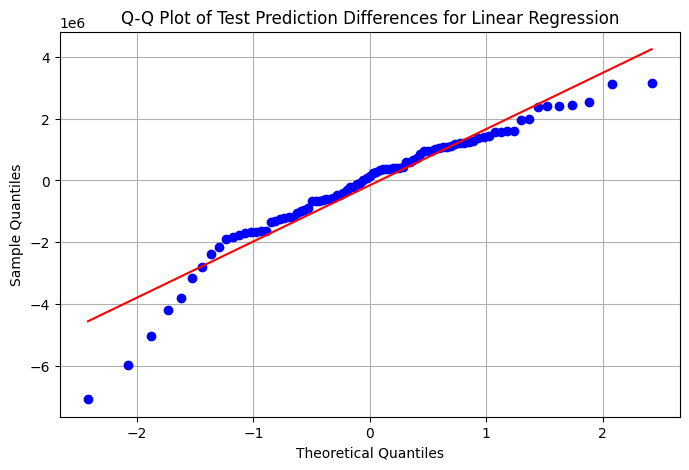

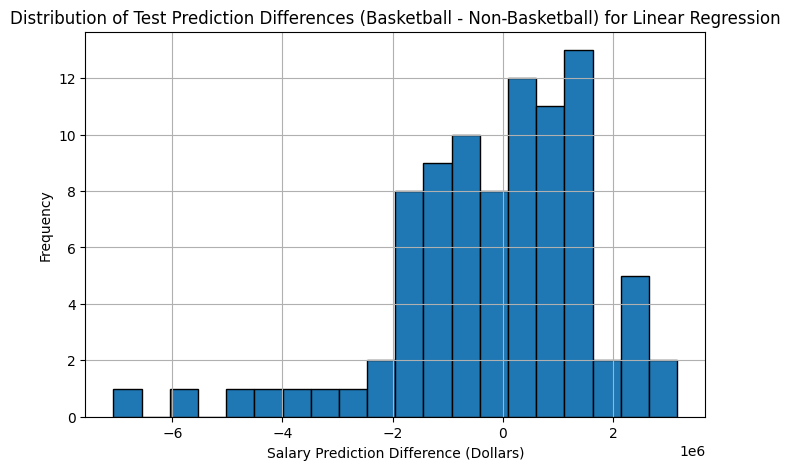


Diagnostics for Ridge Regression:
Basketball Features MAE Folds: ['3856472.20', '4296475.84', '4254339.11', '3541549.24', '3592792.25']
Basketball Features MAE Mean: 3908325.73
Basketball Features MAE Std: 356076.16
Non-Basketball Features MAE Folds: ['3834568.80', '4083235.10', '3806456.98', '3099056.81', '3507285.88']
Non-Basketball Features MAE Mean: 3666120.71
Non-Basketball Features MAE Std: 377108.54
CV MAE Differences (Basketball - Non-Basketball): ['21903.40', '213240.73', '447882.14', '442492.43', '85506.37']
CV MAE Differences Mean: 242205.01, Std: 197702.00
Test Prediction Differences (Basketball - Non-Basketball): Mean=-129040.80, Std=1425398.20
Test Absolute Error (Basketball Features): Mean=4197284.34
Test Absolute Error (Non-Basketball Features): Mean=3747815.81
Shapiro-Wilk Test for Normality: p-value=0.0000034180 (Non-Normal)
Wilcoxon Test p-value (Basketball Errors > Non-Basketball Errors): 0.0030042462 (Significant)


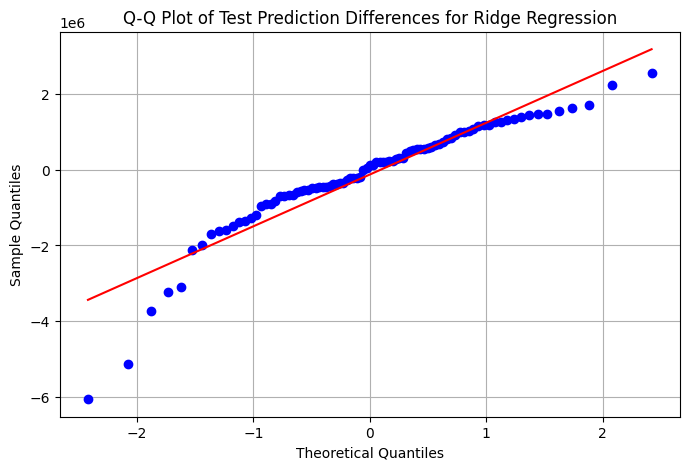

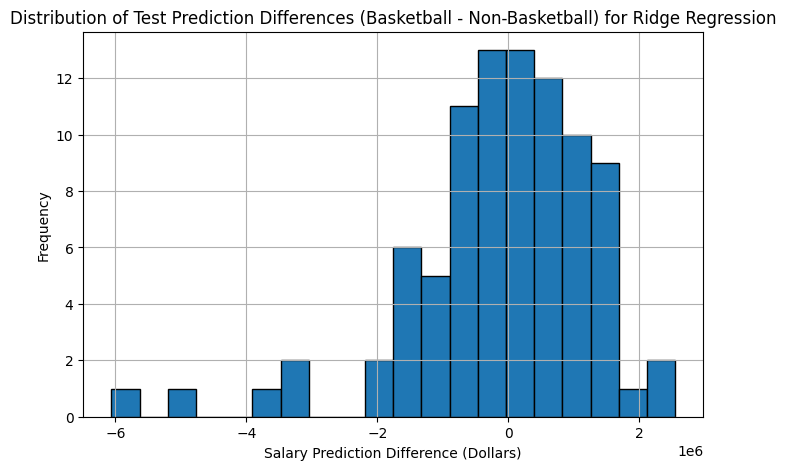


Diagnostics for Lasso Regression:
Basketball Features MAE Folds: ['3761498.78', '4568600.45', '4476517.21', '3947381.21', '3565040.63']
Basketball Features MAE Mean: 4063807.66
Basketball Features MAE Std: 441265.02
Non-Basketball Features MAE Folds: ['3708721.84', '4512573.12', '4257993.62', '3495448.90', '3510581.45']
Non-Basketball Features MAE Mean: 3897063.79
Non-Basketball Features MAE Std: 462400.77
CV MAE Differences (Basketball - Non-Basketball): ['52776.94', '56027.33', '218523.60', '451932.31', '54459.17']
CV MAE Differences Mean: 166743.87, Std: 174548.03
Test Prediction Differences (Basketball - Non-Basketball): Mean=-164667.25, Std=1819415.85
Test Absolute Error (Basketball Features): Mean=4184810.54
Test Absolute Error (Non-Basketball Features): Mean=3684783.15
Shapiro-Wilk Test for Normality: p-value=0.0002563390 (Non-Normal)
Wilcoxon Test p-value (Basketball Errors > Non-Basketball Errors): 0.0044431778 (Significant)


/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.351e+15, tolerance: 3.638e+12
  model = cd_fast.enet_coordinate_descent(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.526e+15, tolerance: 2.844e+12
  model = cd_fast.enet_coordinate_descent(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

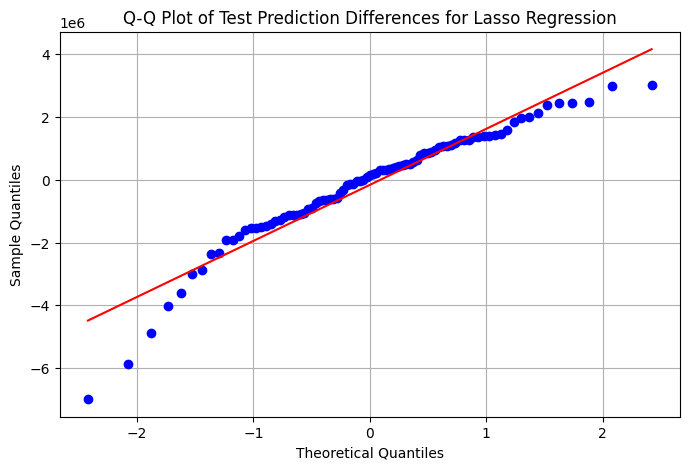

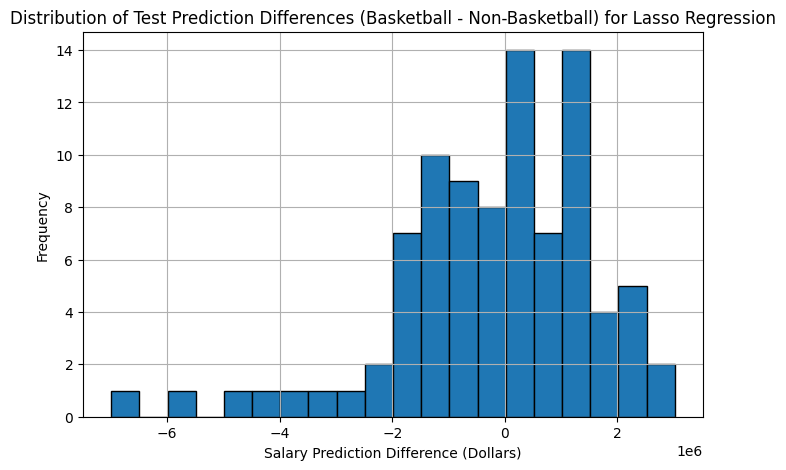


Diagnostics for Decision Tree:
Basketball Features MAE Folds: ['4034484.21', '4524719.33', '4470040.79', '4196043.89', '2595669.45']
Basketball Features MAE Mean: 3964191.53
Basketball Features MAE Std: 790826.17
Non-Basketball Features MAE Folds: ['3601064.04', '3671415.94', '3790473.79', '3752321.18', '4275046.69']
Non-Basketball Features MAE Mean: 3818064.33
Non-Basketball Features MAE Std: 265758.89
CV MAE Differences (Basketball - Non-Basketball): ['433420.17', '853303.39', '679567.00', '443722.72', '-1679377.23']
CV MAE Differences Mean: 146127.21, Std: 1035401.25
Test Prediction Differences (Basketball - Non-Basketball): Mean=-739888.88, Std=4126784.64
Test Absolute Error (Basketball Features): Mean=3672115.90
Test Absolute Error (Non-Basketball Features): Mean=3262377.84
Shapiro-Wilk Test for Normality: p-value=0.0000000091 (Non-Normal)
Wilcoxon Test p-value (Basketball Errors > Non-Basketball Errors): 0.3043504445 (Not Significant)


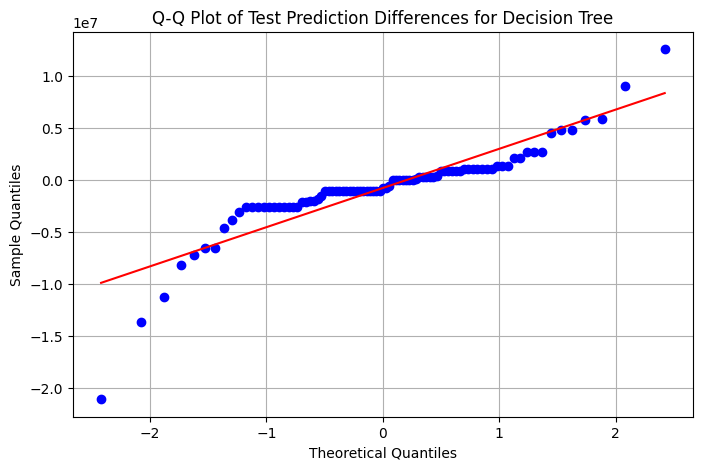

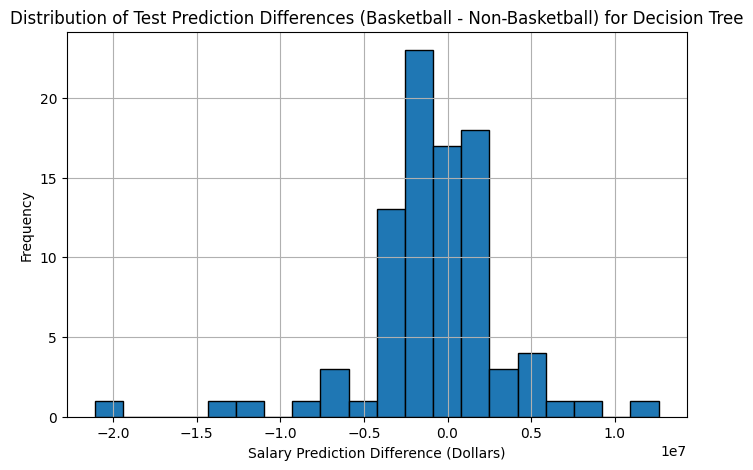


Diagnostics for Random Forest:
Basketball Features MAE Folds: ['2896142.47', '3353687.97', '3333322.61', '3312275.79', '2643865.67']
Basketball Features MAE Mean: 3107858.90
Basketball Features MAE Std: 321389.81
Non-Basketball Features MAE Folds: ['2734816.92', '3130814.25', '3286862.53', '3125710.51', '2609950.80']
Non-Basketball Features MAE Mean: 2977631.00
Non-Basketball Features MAE Std: 289466.83
CV MAE Differences (Basketball - Non-Basketball): ['161325.55', '222873.72', '46460.09', '186565.28', '33914.87']
CV MAE Differences Mean: 130227.90, Std: 85172.56
Test Prediction Differences (Basketball - Non-Basketball): Mean=-91003.59, Std=1688157.97
Test Absolute Error (Basketball Features): Mean=3318613.10
Test Absolute Error (Non-Basketball Features): Mean=2965484.43
Shapiro-Wilk Test for Normality: p-value=0.0000000015 (Non-Normal)
Wilcoxon Test p-value (Basketball Errors > Non-Basketball Errors): 0.0068503397 (Significant)


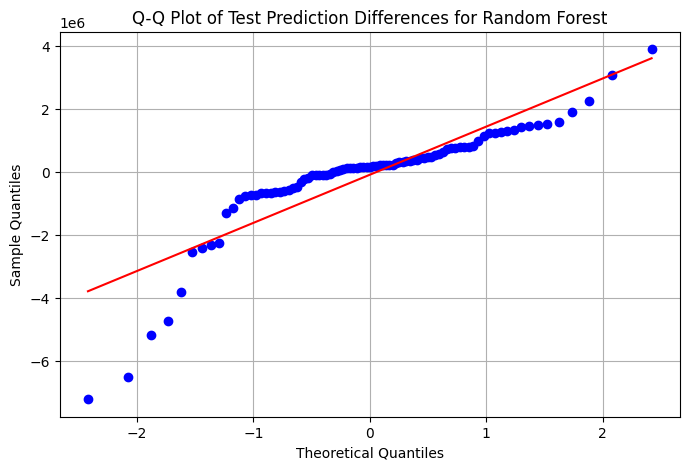

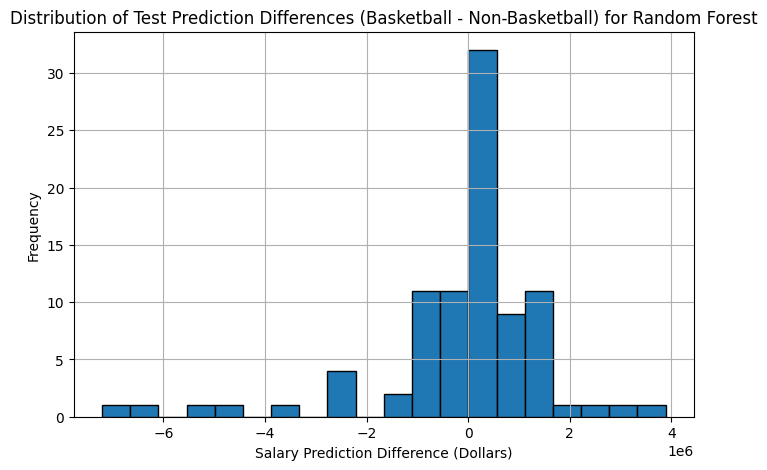


Diagnostics for XGBoost:
Basketball Features MAE Folds: ['3106259.67', '3130799.59', '3509375.76', '3288460.87', '2552841.57']
Basketball Features MAE Mean: 3117547.49
Basketball Features MAE Std: 354237.41
Non-Basketball Features MAE Folds: ['2693615.43', '2618362.09', '3239189.19', '3017723.37', '2694467.32']
Non-Basketball Features MAE Mean: 2852671.48
Non-Basketball Features MAE Std: 265455.43
CV MAE Differences (Basketball - Non-Basketball): ['412644.24', '512437.50', '270186.57', '270737.50', '-141625.74']
CV MAE Differences Mean: 264876.01, Std: 249212.95
Test Prediction Differences (Basketball - Non-Basketball): Mean=-646121.06, Std=2772106.00
Test Absolute Error (Basketball Features): Mean=3516959.15
Test Absolute Error (Non-Basketball Features): Mean=2910528.18
Shapiro-Wilk Test for Normality: p-value=0.0000000001 (Non-Normal)
Wilcoxon Test p-value (Basketball Errors > Non-Basketball Errors): 0.0101212911 (Significant)


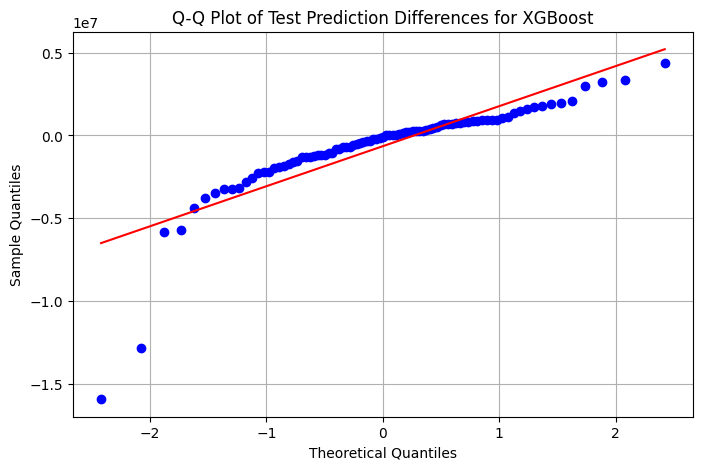

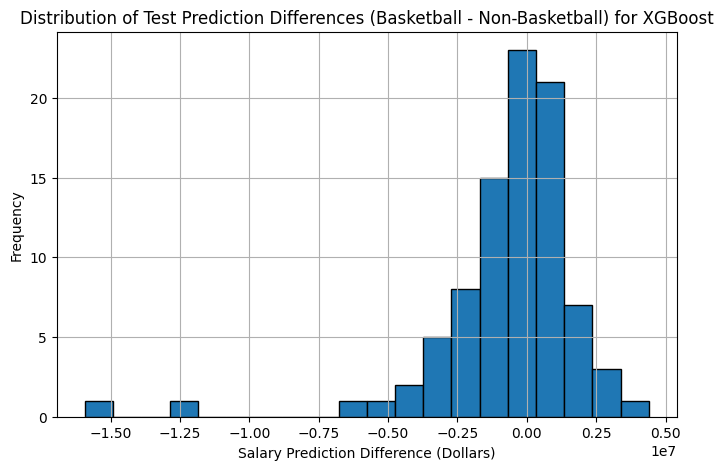

/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.wa


Diagnostics for MLP:
Basketball Features MAE Folds: ['2970660.53', '3724806.65', '3441613.73', '3450227.44', '3001593.94']
Basketball Features MAE Mean: 3317780.46
Basketball Features MAE Std: 323656.21
Non-Basketball Features MAE Folds: ['3214596.68', '3861375.86', '3155835.07', '3183242.95', '2885678.00']
Non-Basketball Features MAE Mean: 3260145.71
Non-Basketball Features MAE Std: 360753.80
CV MAE Differences (Basketball - Non-Basketball): ['-243936.15', '-136569.21', '285778.66', '266984.49', '115915.94']
CV MAE Differences Mean: 57634.75, Std: 238712.08
Test Prediction Differences (Basketball - Non-Basketball): Mean=-103463.47, Std=1277866.48
Test Absolute Error (Basketball Features): Mean=3436726.64
Test Absolute Error (Non-Basketball Features): Mean=3380124.80
Shapiro-Wilk Test for Normality: p-value=0.0029674682 (Non-Normal)
Wilcoxon Test p-value (Basketball Errors > Non-Basketball Errors): 0.3975096194 (Not Significant)


/Users/emilfalk/Library/Python/3.12/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


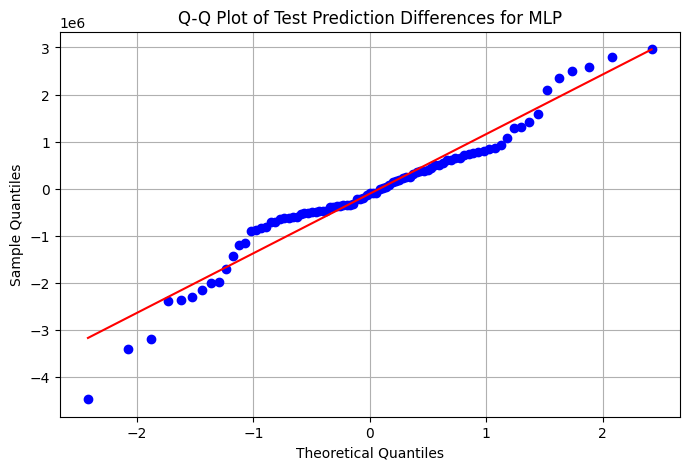

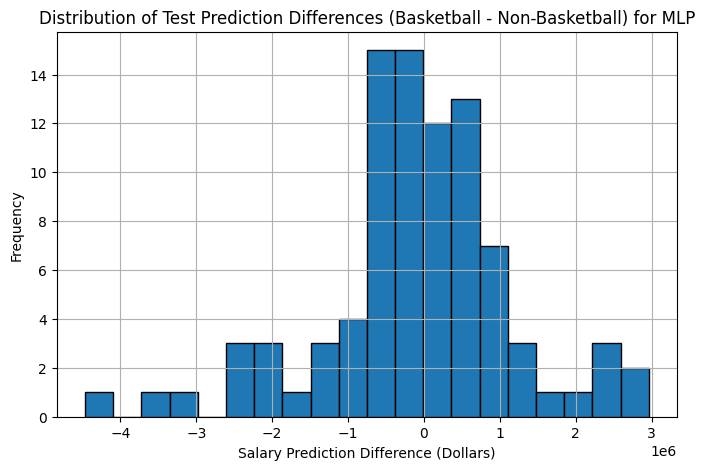


Model Evaluation Results:
                Model              Feature Set Dataset          MAE     R2  \
0   Linear Regression      Basketball Features    Test 4210336.7310 0.6694   
1   Linear Regression  Non-Basketball Features    Test 3722742.0626 0.7482   
2    Ridge Regression      Basketball Features    Test 4197284.3360 0.6927   
3    Ridge Regression  Non-Basketball Features    Test 3747815.8138 0.7522   
4    Lasso Regression      Basketball Features    Test 4184810.5377 0.6737   
5    Lasso Regression  Non-Basketball Features    Test 3684783.1455 0.7499   
6       Decision Tree      Basketball Features    Test 3672115.9038 0.6404   
7       Decision Tree  Non-Basketball Features    Test 3262377.8422 0.7485   
8       Random Forest      Basketball Features    Test 3318613.1020 0.7551   
9       Random Forest  Non-Basketball Features    Test 2965484.4318 0.8089   
10            XGBoost      Basketball Features    Test 3516959.1503 0.7043   
11            XGBoost  Non-Basketball

In [15]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import shapiro, probplot, wilcoxon
import pandas as pd
import matplotlib.pyplot as plt
import time

np.random.seed(42)

models = [
    {
        'name': 'Linear Regression',
        'model_basketball': LinearRegression(),
        'model_full': LinearRegression()
    },
    {
        'name': 'Ridge Regression',
        'model_basketball': Ridge(alpha=100.0),
        'model_full': Ridge(alpha=100.0)
    },
    {
        'name': 'Lasso Regression',
        'model_basketball': Lasso(alpha=100.0, random_state=42),
        'model_full': Lasso(alpha=100.0, random_state=42)
    },
    {
        'name': 'Decision Tree',
        'model_basketball': DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=42),
        'model_full': DecisionTreeRegressor(max_depth=3, min_samples_split=10, random_state=42)
    },
    {
        'name': 'Random Forest',
        'model_basketball': RandomForestRegressor(max_depth=None, n_estimators=200, random_state=42),
        'model_full': RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)
    },
    {
        'name': 'XGBoost',
        'model_basketball': XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42),
        'model_full': XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
    },
    {
        'name': 'MLP',
        'model_basketball': MLPRegressor(hidden_layer_sizes=(50, 50), learning_rate_init=0.01, random_state=42, max_iter=1000),
        'model_full': MLPRegressor(hidden_layer_sizes=(50, 50), learning_rate_init=0.01, random_state=42, max_iter=1000)
    }
]

cv_folds = 5
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
results = []
wilcoxon_results = []
alpha = 0.05
mae_scale = 1_000_000

def evaluate_model(model, X_train, X_test, y_train, y_test, feature_set, model_name):
    if X_train.ndim > 2:
        X_train = X_train.reshape(X_train.shape[0], -1)
    if X_test.ndim > 2:
        X_test = X_test.reshape(X_test.shape[0], -1)

    start_time = time.time()
    model.fit(X_train, y_train.values.ravel())
    train_time = time.time() - start_time

    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    mae_folds = []
    cv_train_times = []
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold = X_train[train_idx]
        X_val_fold = X_train[val_idx]
        y_train_fold = y_train.iloc[train_idx] if isinstance(y_train, pd.DataFrame) else y_train[train_idx]
        y_val_fold = y_train.iloc[val_idx] if isinstance(y_train, pd.DataFrame) else y_train[val_idx]
        
        start_fold_time = time.time()
        model.fit(X_train_fold, y_train_fold.values.ravel() if isinstance(y_train_fold, pd.DataFrame) else y_train_fold)
        fold_train_time = time.time() - start_fold_time
        cv_train_times.append(fold_train_time)
        
        y_pred_fold = model.predict(X_val_fold)
        mae_folds.append(mean_absolute_error(y_val_fold, y_pred_fold))
    
    cv_mae_std = np.std(mae_folds, ddof=1) / mae_scale
    
    results.append({
        'Model': model_name,
        'Feature Set': feature_set,
        'Dataset': 'Test',
        'MAE': test_mae,
        'R2': test_r2,
        'CV MAE Folds': mae_folds,
        'CV MAE Mean': np.mean(mae_folds) / mae_scale,
        'CV MAE Std': cv_mae_std,
        'Training Time (s)': train_time,
        'CV Avg Training Time (s)': np.mean(cv_train_times)
    })
    
    return model, mae_folds, y_test_pred

for model_info in models:
    name = model_info['name']
    model_basketball = model_info['model_basketball']
    model_full = model_info['model_full']
    
    _, mae_basketball_folds, y_test_pred_basketball = evaluate_model(
        model_basketball, 
        X_train_basketball_scaled, 
        X_test_basketball_scaled, 
        y_train, 
        y_test, 
        'Basketball Features', 
        name
    )
    
    _, mae_full_folds, y_test_pred_full = evaluate_model(
        model_full, 
        X_train_scaled, 
        X_test_scaled, 
        y_train, 
        y_test, 
        'Non-Basketball Features', 
        name
    )
    
    print(f"\nDiagnostics for {name}:")
    print(f"Basketball Features MAE Folds: {[f'{mae:.2f}' for mae in mae_basketball_folds]}")
    print(f"Basketball Features MAE Mean: {np.mean(mae_basketball_folds):.2f}")
    print(f"Basketball Features MAE Std: {np.std(mae_basketball_folds, ddof=1):.2f}")
    print(f"Non-Basketball Features MAE Folds: {[f'{mae:.2f}' for mae in mae_full_folds]}")
    print(f"Non-Basketball Features MAE Mean: {np.mean(mae_full_folds):.2f}")
    print(f"Non-Basketball Features MAE Std: {np.std(mae_full_folds, ddof=1):.2f}")
    differences = np.array(mae_basketball_folds) - np.array(mae_full_folds)
    print(f"CV MAE Differences (Basketball - Non-Basketball): {[f'{diff:.2f}' for diff in differences]}")
    print(f"CV MAE Differences Mean: {np.mean(differences):.2f}, Std: {np.std(differences, ddof=1):.2f}")
    
    test_pred_differences = y_test_pred_basketball - y_test_pred_full
    print(f"Test Prediction Differences (Basketball - Non-Basketball): Mean={np.mean(test_pred_differences):.2f}, "
          f"Std={np.std(test_pred_differences, ddof=1):.2f}")
    
    abs_error_basketball = np.abs(y_test.values.ravel() - y_test_pred_basketball)
    abs_error_full = np.abs(y_test.values.ravel() - y_test_pred_full)
    print(f"Test Absolute Error (Basketball Features): Mean={np.mean(abs_error_basketball):.2f}")
    print(f"Test Absolute Error (Non-Basketball Features): Mean={np.mean(abs_error_full):.2f}")

    stat, p_value = shapiro(test_pred_differences)
    print(f"Shapiro-Wilk Test for Normality: p-value={p_value:.10f} "
          f"({'Normal' if p_value > 0.05 else 'Non-Normal'})")
    
    try:
        stat_w, p_value_w = wilcoxon(abs_error_basketball, abs_error_full, alternative='greater')
        improvement_significant = p_value_w < alpha
        print(f"Wilcoxon Test p-value (Basketball Errors > Non-Basketball Errors): {p_value_w:.10f} "
              f"({'Significant' if improvement_significant else 'Not Significant'})")

        wilcoxon_results.append({
            'Model': name,
            'MAE Mean (Basketball Features)': np.mean(abs_error_basketball) / mae_scale,
            'MAE Mean (Non-Basketball Features)': np.mean(abs_error_full) / mae_scale,
            'MAE Difference (Basketball - Non-Basketball)': (np.mean(abs_error_basketball) - np.mean(abs_error_full)) / mae_scale,
            'Wilcoxon Statistic': stat_w,
            'Wilcoxon p-value': p_value_w,
            'Improvement Significant': 'Yes' if improvement_significant else 'No'
        })
    except ValueError as e:
        print(f"Wilcoxon Test failed: {e}")
        wilcoxon_results.append({
            'Model': name,
            'MAE Mean (Basketball Features)': np.mean(abs_error_basketball) / mae_scale,
            'MAE Mean (Non-Basketball Features)': np.mean(abs_error_full) / mae_scale,
            'MAE Difference (Basketball - Non-Basketball)': (np.mean(abs_error_basketball) - np.mean(abs_error_full)) / mae_scale,
            'Wilcoxon Statistic': np.nan,
            'Wilcoxon p-value': np.nan,
            'Improvement Significant': 'No'
        })
    
    plt.figure(figsize=(8, 5))
    probplot(test_pred_differences, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Test Prediction Differences for {name}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(8, 5))
    plt.hist(test_pred_differences, bins=20, edgecolor='black')
    plt.title(f'Distribution of Test Prediction Differences (Basketball - Non-Basketball) for {name}')
    plt.xlabel('Salary Prediction Difference (Dollars)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

results_df = pd.DataFrame(results)
wilcoxon_df = pd.DataFrame(wilcoxon_results)
pd.set_option('display.float_format', '{:.4f}'.format)

print("\nModel Evaluation Results:")
print(results_df[['Model', 'Feature Set', 'Dataset', 'MAE', 'R2', 'CV MAE Mean', 'CV MAE Std', 'Training Time (s)', 'CV Avg Training Time (s)']])

print("\nWilcoxon Test Results for Test Set Absolute Errors:")
print(wilcoxon_df[['Model', 'MAE Mean (Basketball Features)', 'MAE Mean (Non-Basketball Features)', 
                   'MAE Difference (Basketball - Non-Basketball)', 'Wilcoxon Statistic', 
                   'Wilcoxon p-value', 'Improvement Significant']])

print("\nModels with Significant Improvements in Test Set Errors (p < 0.05):")
significant_models = wilcoxon_df[wilcoxon_df['Improvement Significant'] == 'Yes']
if not significant_models.empty:
    print(significant_models[['Model', 'MAE Difference (Basketball - Non-Basketball)', 'Wilcoxon p-value']])
else:
    print("No models showed significant improvements.")

print("\nTarget Variable Diagnostics:")
print("y_train stats:", y_train.describe())
print("y_test stats:", y_test.describe())

In [68]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import uniform, randint
import pandas as pd
import time

np.random.seed(42)
tf.random.set_seed(42)

X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
X_train_basketball_scaled = X_train_basketball_scaled.reshape(X_train_basketball_scaled.shape[0], X_train_basketball_scaled.shape[1], 1)
X_test_basketball_scaled = X_test_basketball_scaled.reshape(X_test_basketball_scaled.shape[0], X_test_basketball_scaled.shape[1], 1)

print(f"Full feature set shape: {X_train_scaled.shape}")
print(f"Basketball feature set shape: {X_train_basketball_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

def create_cnn_model(learning_rate=0.001, l2_reg=0.01, dropout_rate_1=0.2, 
                     dropout_rate_2=0.2, dropout_rate_3=0.3, filters_1=32, 
                     filters_2=16, dense_units=50, input_dim=None):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=filters_1, kernel_size=3, activation='relu', 
                              input_shape=(input_dim, 1), padding='same'),
        tf.keras.layers.Dropout(dropout_rate_1),
        tf.keras.layers.Conv1D(filters=filters_2, kernel_size=3, activation='relu', 
                              padding='same'),
        tf.keras.layers.Dropout(dropout_rate_2),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(dense_units, activation='relu', 
                             kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
        tf.keras.layers.Dropout(dropout_rate_3),
        tf.keras.layers.Dense(1)  
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

results = []

def evaluate_model(model, X_train, X_test, y_train, y_test, feature_set):
    try:
        start_time = time.time()
        model.fit(X_train, y_train.values.ravel())
        train_time = time.time() - start_time

        y_test_pred = model.predict(X_test)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        mae_folds = []
        for train_idx, val_idx in cv.split(X_train):
            X_train_fold = X_train[train_idx]
            X_val_fold = X_train[val_idx]
            y_train_fold = y_train.iloc[train_idx] if isinstance(y_train, pd.DataFrame) else y_train[train_idx]
            y_val_fold = y_train.iloc[val_idx] if isinstance(y_train, pd.DataFrame) else y_train[val_idx]
            
            model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)
            y_pred_fold = model.predict(X_val_fold, verbose=0).flatten()
            mae_folds.append(mean_absolute_error(y_val_fold, y_pred_fold))
        
        cv_mae_mean = np.mean(mae_folds)
        cv_mae_std = np.std(mae_folds, ddof=1)
        
        print(f"\nDiagnostics for 1D CNN ({feature_set}):")
        print(f"CV MAE Folds: {[f'{mae:.2f}' for mae in mae_folds]}")
        print(f"CV MAE Mean: {cv_mae_mean:.2f}")
        print(f"CV MAE Std: {cv_mae_std:.2f}")
        print(f"Training Time (s): {train_time:.4f}")

        mae_scale = 1_000_000
        results.append({
            'Model': '1D CNN Regression',
            'Feature Set': feature_set,
            'Dataset': 'Test',
            'MAE': test_mae,
            'R2': test_r2,
            'CV MAE Mean': cv_mae_mean,
            'CV MAE Std': cv_mae_std
        })
    except Exception as e:
        print(f"Error evaluating model for {feature_set}: {e}")
        results.append({
            'Model': '1D CNN Regression',
            'Feature Set': feature_set,
            'Dataset': 'Test',
            'MAE': np.nan,
            'R2': np.nan,
            'CV MAE Mean': np.nan,
            'CV MAE Std': np.nan
        })
    return model

param_dist = {
    'model__learning_rate': uniform(1e-5, 1e-3),  
    'model__l2_reg': uniform(0.01, 0.1),         
    'model__dropout_rate_1': uniform(0.2, 0.4),  
    'model__dropout_rate_2': uniform(0.2, 0.4), 
    'model__dropout_rate_3': uniform(0.3, 0.4),  
    'model__filters_1': randint(16, 64),        
    'model__filters_2': randint(8, 32),         
    'model__dense_units': randint(20, 100),     
    'batch_size': [8, 16, 32]
}

try:
    cnn_basketball = KerasRegressor(
        model=create_cnn_model,
        epochs=50,
        verbose=0,
        input_dim=X_train_basketball_scaled.shape[1]
    )
    grid_search_basketball = RandomizedSearchCV(cnn_basketball, param_dist, n_iter=10, cv=5, 
                                               scoring='r2', n_jobs=1, random_state=42, 
                                               error_score='raise')
    grid_search_basketball.fit(X_train_basketball_scaled, y_train.values.ravel())
    cnn_basketball = evaluate_model(grid_search_basketball.best_estimator_, 
                                   X_train_basketball_scaled, X_test_basketball_scaled, 
                                   y_train, y_test, 'Basketball Features')
    print(f"Best 1D CNN params (Basketball Features): {grid_search_basketball.best_params_}")
except Exception as e:
    print(f"Error in randomized search (Basketball Features): {e}")
    cnn_basketball = None

try:
    cnn_full = KerasRegressor(
        model=create_cnn_model,
        epochs=50,
        verbose=0,
        input_dim=X_train_scaled.shape[1]
    )
    grid_search_full = RandomizedSearchCV(cnn_full, param_dist, n_iter=10, cv=5, 
                                         scoring='r2', n_jobs=1, random_state=42, 
                                         error_score='raise')
    grid_search_full.fit(X_train_scaled, y_train.values.ravel())
    cnn_full = evaluate_model(grid_search_full.best_estimator_, 
                             X_train_scaled, X_test_scaled, 
                             y_train, y_test, 'Non-Basketball Features')
    print(f"Best 1D CNN params (Non-Basketball Features): {grid_search_full.best_params_}")
except Exception as e:
    print(f"Error in randomized search (Non-Basketball Features): {e}")
    cnn_full = None

results_df = pd.DataFrame(results)
pd.set_option('display.float_format', '{:.4f}'.format)  

print("\n1D CNN Regression Results:")
print(results_df)

Full feature set shape: (354, 35, 1)
Basketball feature set shape: (354, 28, 1)
y_train shape: (354, 1)


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefe


Diagnostics for 1D CNN (Basketball Features):
CV MAE Folds: ['8657476.56', '7687170.86', '8418318.23', '7766221.51', '8673787.96']
CV MAE Mean: 8240595.02
CV MAE Std: 480713.12
Training Time (s): 1.8452
Best 1D CNN params (Basketball Features): {'batch_size': 8, 'model__dense_units': 95, 'model__dropout_rate_1': 0.4446612641953124, 'model__dropout_rate_2': 0.20282652208788698, 'model__dropout_rate_3': 0.3092249700165663, 'model__filters_1': 42, 'model__filters_2': 17, 'model__l2_reg': 0.014666566321361544, 'model__learning_rate': 0.0009837555188414592}


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefe


Diagnostics for 1D CNN (Non-Basketball Features):
CV MAE Folds: ['8653884.59', '7637012.32', '8328600.33', '7666971.85', '8626308.52']
CV MAE Mean: 8182555.52
CV MAE Std: 500959.28
Training Time (s): 1.9350
Best 1D CNN params (Non-Basketball Features): {'batch_size': 8, 'model__dense_units': 95, 'model__dropout_rate_1': 0.4446612641953124, 'model__dropout_rate_2': 0.20282652208788698, 'model__dropout_rate_3': 0.3092249700165663, 'model__filters_1': 42, 'model__filters_2': 17, 'model__l2_reg': 0.014666566321361544, 'model__learning_rate': 0.0009837555188414592}

1D CNN Regression Results:
               Model              Feature Set Dataset          MAE     R2  \
0  1D CNN Regression      Basketball Features    Test 4916106.8066 0.4253   
1  1D CNN Regression  Non-Basketball Features    Test 5213793.0281 0.3975   

   CV MAE Mean  CV MAE Std  
0 8240595.0232 480713.1161  
1 8182555.5217 500959.2802  
